In [1]:
from glob import glob

import numpy as np
from matplotlib import pyplot as plt

from skybed.logger import SkybedLogFile
import seaborn as sns

In [2]:
plt.rcParams['figure.dpi'] = 600

In [3]:

log_files: list[SkybedLogFile] = []

for file_name in sorted(glob("../logs_server/*.json")):
    with open(file_name, "r") as f:
        log_files.append(SkybedLogFile.model_validate_json(f.read()))

log_files

[SkybedLogFile(avg_network_update_count=988.0, avg_network_update_time=0.6072902721396762, uavs_final_state=[UAV(uav_id='0', uav_type='1', speed=55.15908805880605, direction=93.2100301054668, vertical_speed=-1.5885683833831, container=None, evaluation=UAVEvaluation(network_update_count=988, poll_response_count=4917, poll_no_response_count=14), position=Point(52.20475237009189, 13.281573408736447, -648.4845336275315), currently_in_collision=False, previously_in_collision=True, latitude=52.20475237009189, longitude=13.281573408736447, altitude=-648.4845336275315), UAV(uav_id='1', uav_type='1', speed=46.06625452157855, direction=210.01753420381124, vertical_speed=-0.4680609169528829, container=None, evaluation=UAVEvaluation(network_update_count=988, poll_response_count=4931, poll_no_response_count=0), position=Point(52.1495825599245, 13.103624873915928, 26.101361947224454), currently_in_collision=False, previously_in_collision=True, latitude=52.1495825599245, longitude=13.103624873915928,

In [4]:
m = np.zeros((30, 600))

for i, log_file in enumerate(log_files):
    m[i, :(i + 1) * 20] = [uav.evaluation.poll_response_count and uav.evaluation.poll_response_count / (
                uav.evaluation.poll_response_count + uav.evaluation.poll_no_response_count) or 0 for uav in
                           log_file.uavs]

m

array([[0.99716082, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.97967791, 0.97967791, 0.97967791, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [5]:
# m = np.ones(m.shape) - m

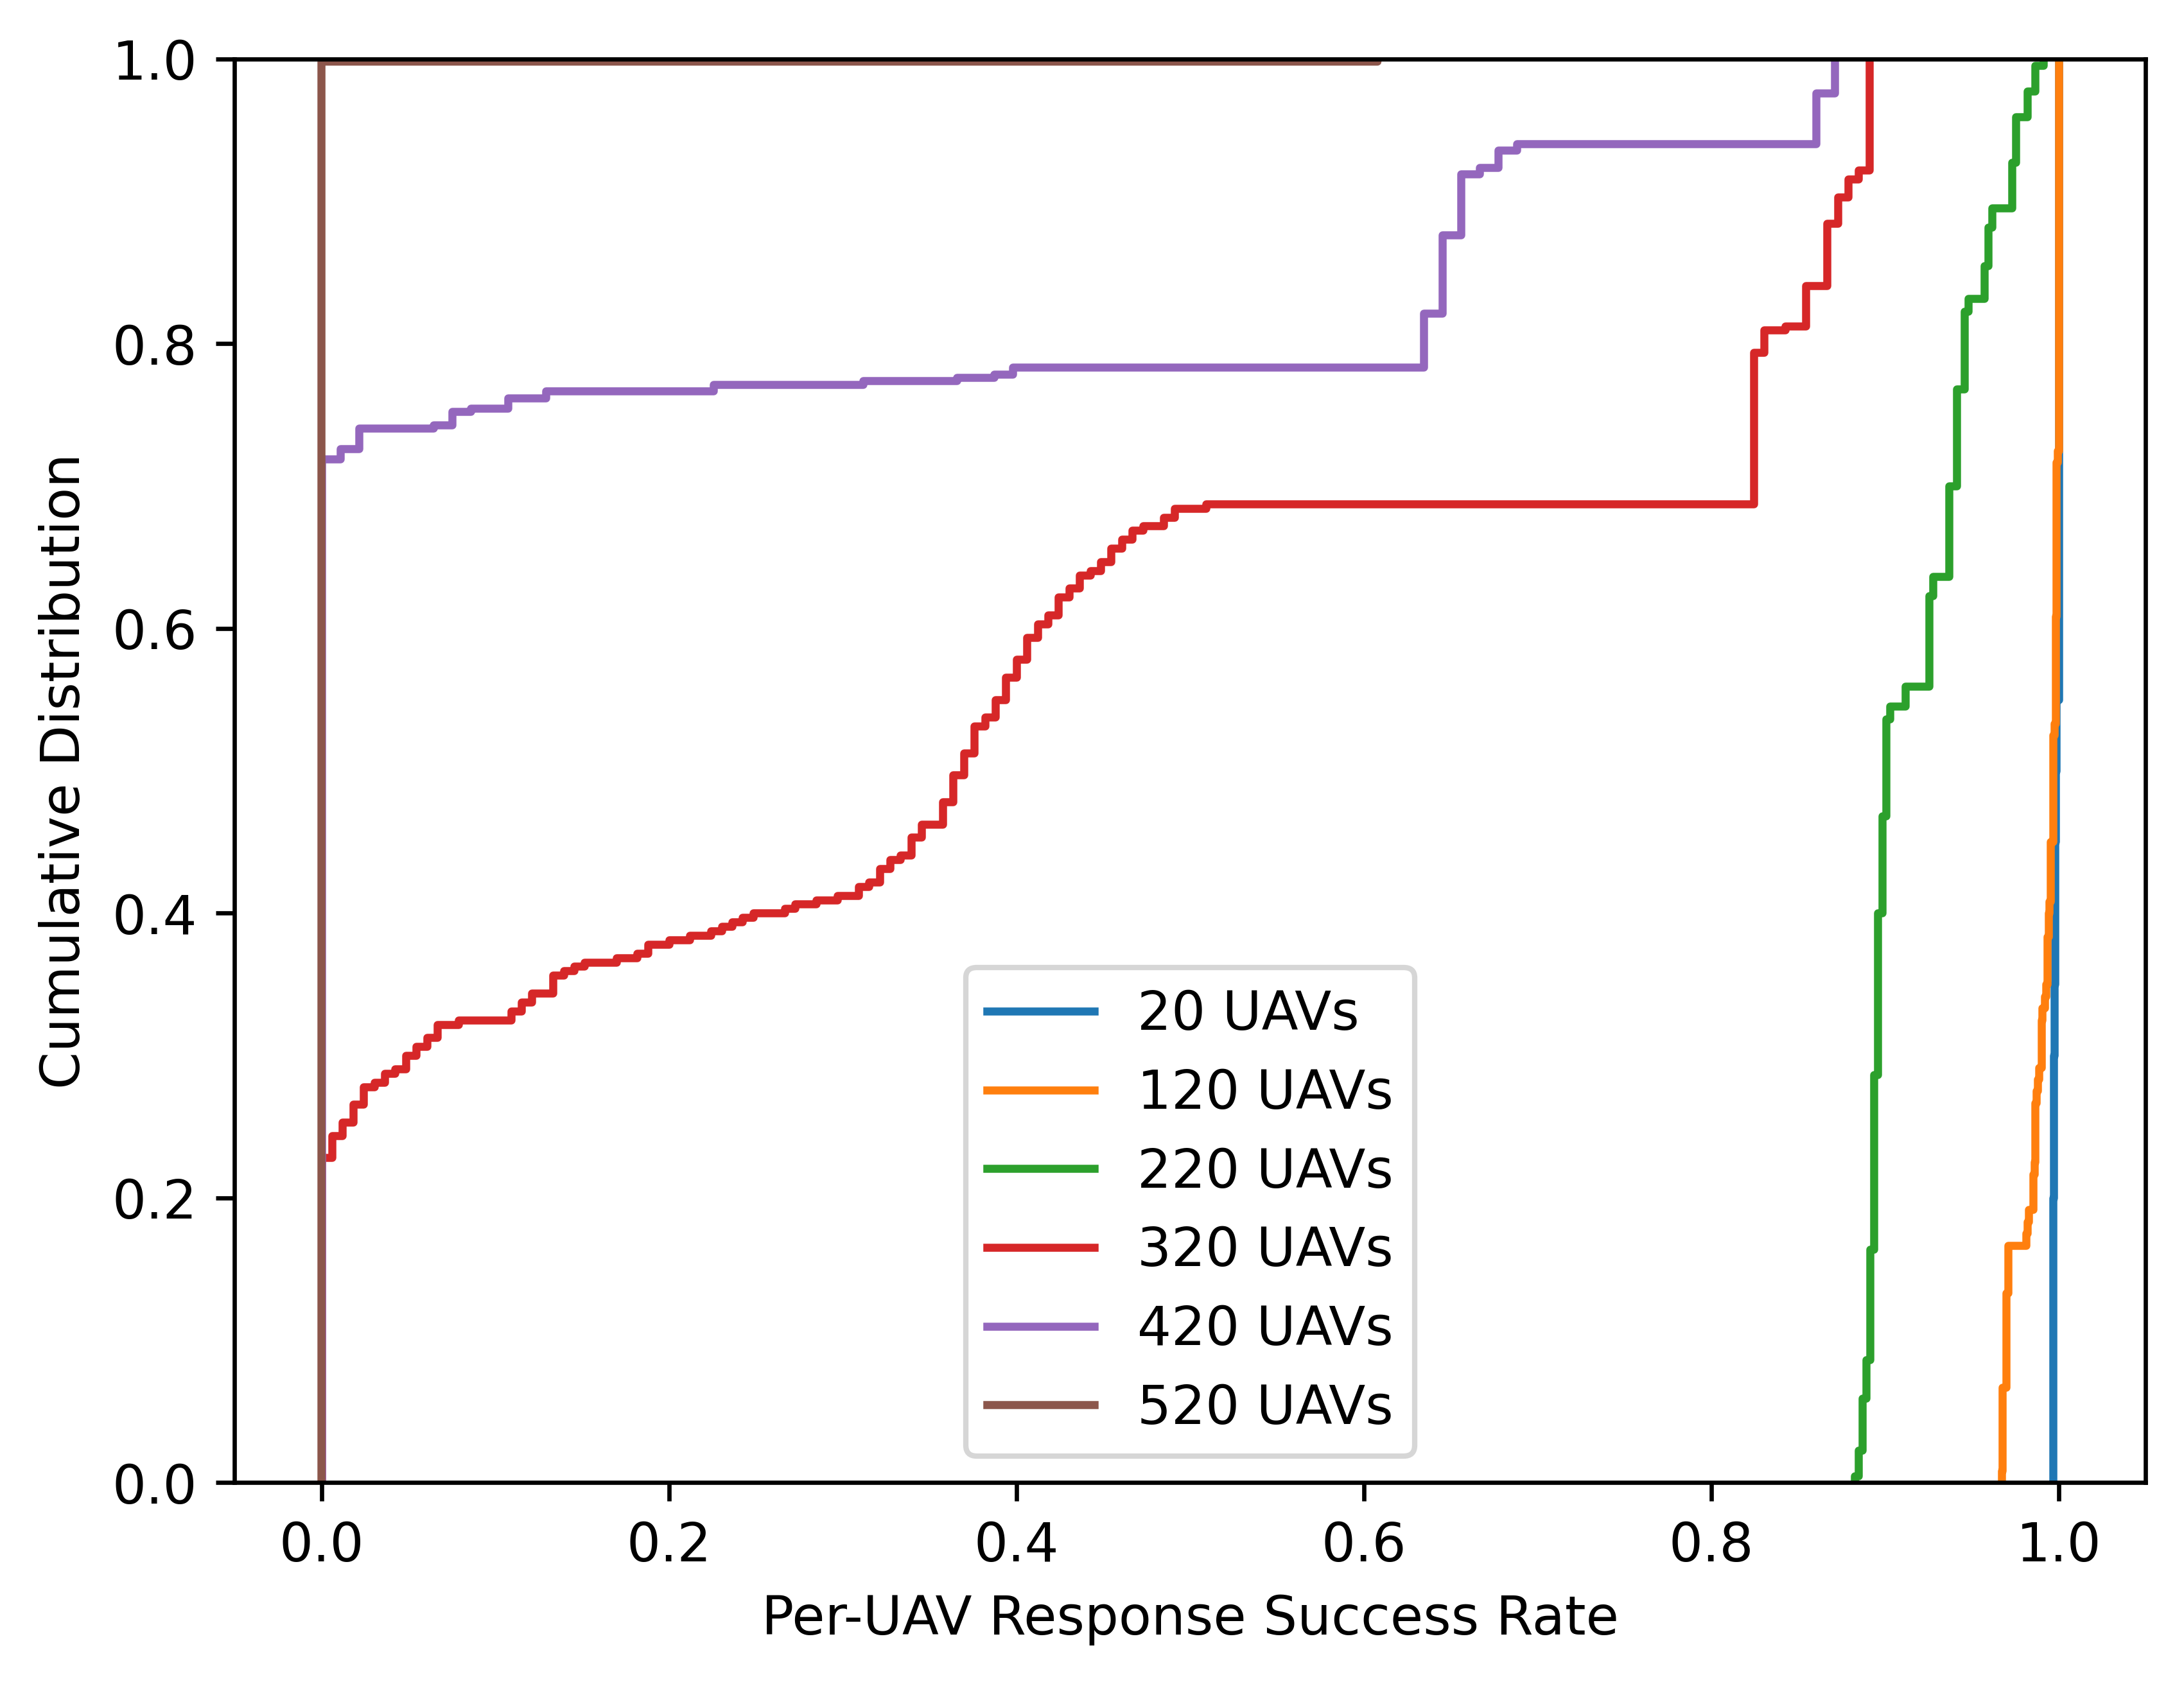

In [6]:
ax = 0
for i in [0, 5, 10, 15, 20, 25]:
    ax = sns.ecdfplot(data=m[i, :(i + 1) * 20], label=f"{(i + 1) * 20} UAVs")

ax.set(xlabel="Per-UAV Response Success Rate", ylabel="Cumulative Distribution")
plt.legend()
plt.show()


In [7]:
n = np.zeros((2, 30))

for i, log_file in enumerate(log_files):
    n[0, i] = log_file.cpu_usage
    n[1, i] = log_file.memory_usage

n

array([[3.33007812e-01, 6.16210938e-01, 1.86523438e+00, 2.18945312e+00,
        1.81640625e+00, 2.06640625e+00, 2.82226562e+00, 3.19824219e+00,
        3.69042969e+00, 4.14062500e+00, 4.50683594e+00, 5.27392578e+00,
        6.57177734e+00, 7.82421875e+00, 9.00781250e+00, 8.25195312e+00,
        9.33349609e+00, 1.01318359e+01, 1.07280273e+01, 1.08740234e+01,
        1.27680664e+01, 1.35747070e+01, 1.51713867e+01, 1.51459961e+01,
        1.58227539e+01, 1.77290039e+01, 1.91630859e+01, 1.87324219e+01,
        1.92246094e+01, 2.01909180e+01],
       [2.99930010e+09, 4.91370086e+09, 6.81883648e+09, 8.80012902e+09,
        1.07288084e+10, 1.26538179e+10, 1.46410127e+10, 1.65685821e+10,
        1.85185526e+10, 2.04711608e+10, 2.24400712e+10, 2.43088835e+10,
        2.63460659e+10, 2.83276616e+10, 3.02744453e+10, 3.22738176e+10,
        3.42591201e+10, 3.61776456e+10, 3.81475676e+10, 4.01514496e+10,
        4.20725473e+10, 4.42165985e+10, 4.62507377e+10, 4.82478612e+10,
        5.01493187e+10,

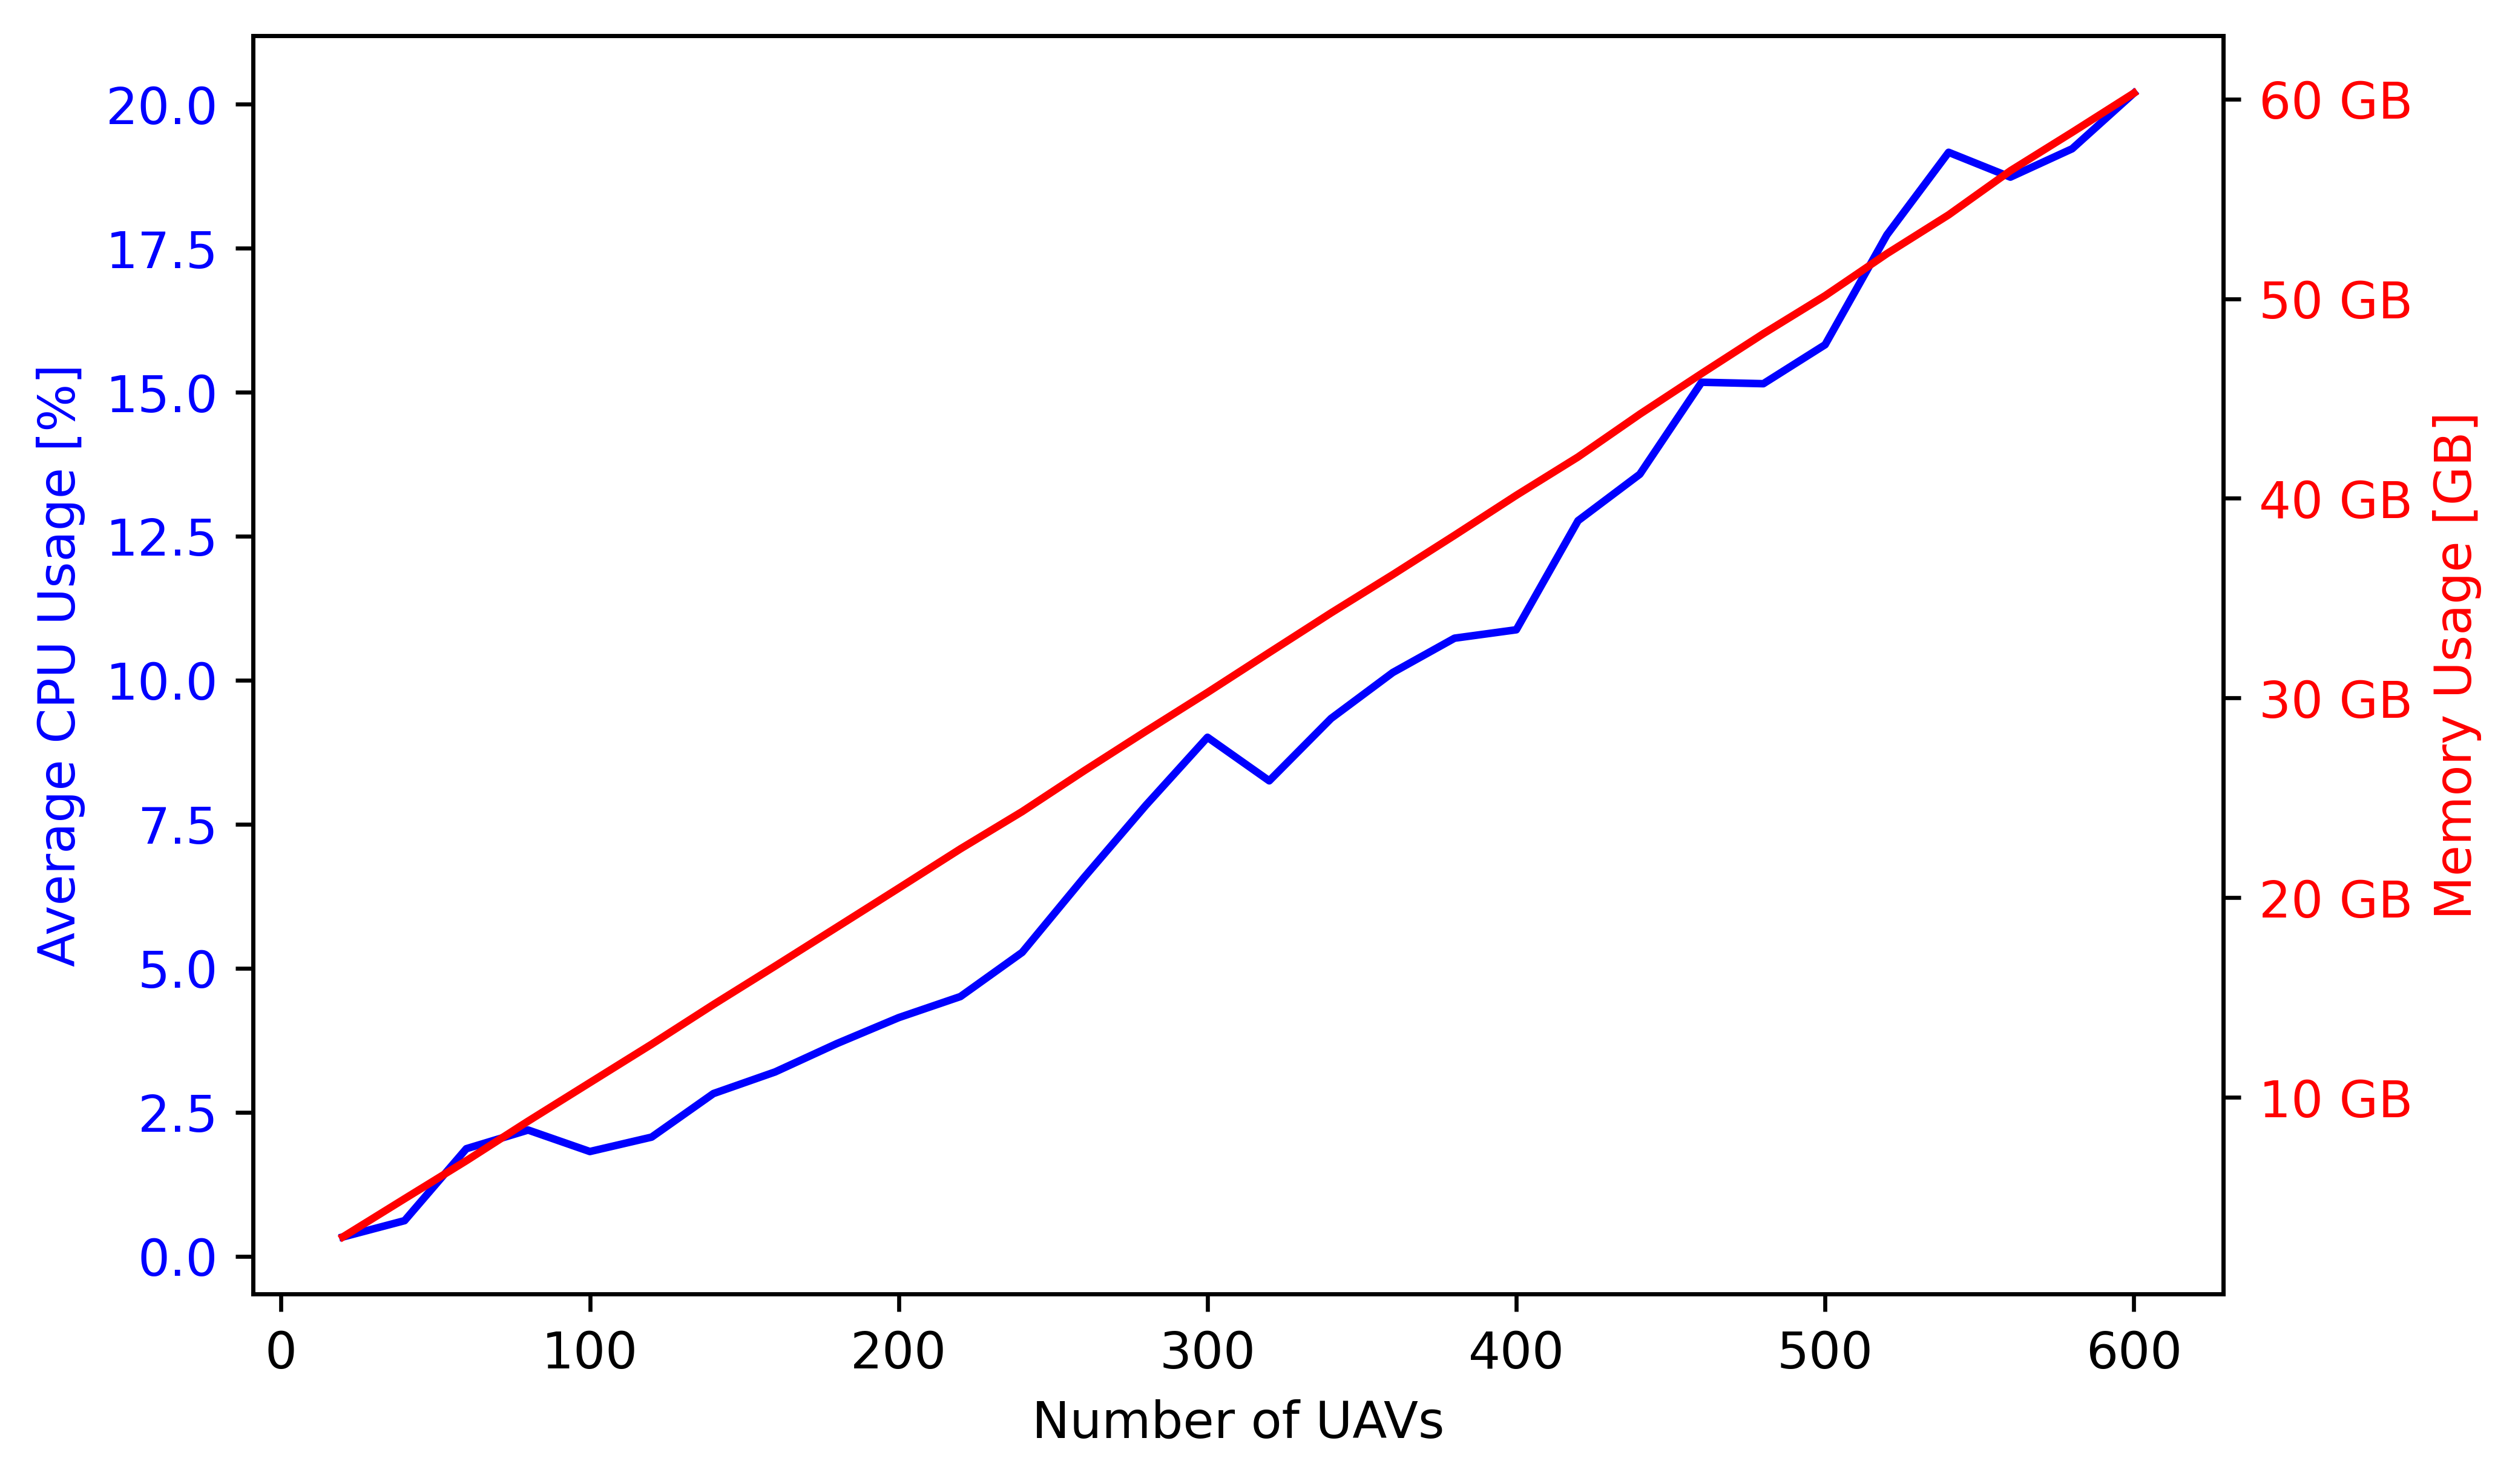

In [15]:
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots(figsize=(7, 4.5))

x = np.arange(20, 620, 20)  # Assuming the x-axis is 1 to 30

# Plot the first line
sns.lineplot(x=x, y=n[0], ax=ax1, color='blue')
ax1.set_ylabel('Average CPU Usage [%]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()

ax1.set_xlabel('Number of UAVs')

# Convert memory usage to GB and plot the second line
sns.lineplot(x=x, y=n[1], ax=ax2, color='red')
ax2.set_ylabel('Memory Usage [GB]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format the y-axis of the second axis to show values in GB
def bytes_to_gb(x, pos):
    return f'{x / 1e9:.0f} GB'  # Divide by 1e9 and format as GB

formatter = mticker.FuncFormatter(bytes_to_gb)
ax2.yaxis.set_major_formatter(formatter)

# Show the plot
# plt.tight_layout()
plt.show()


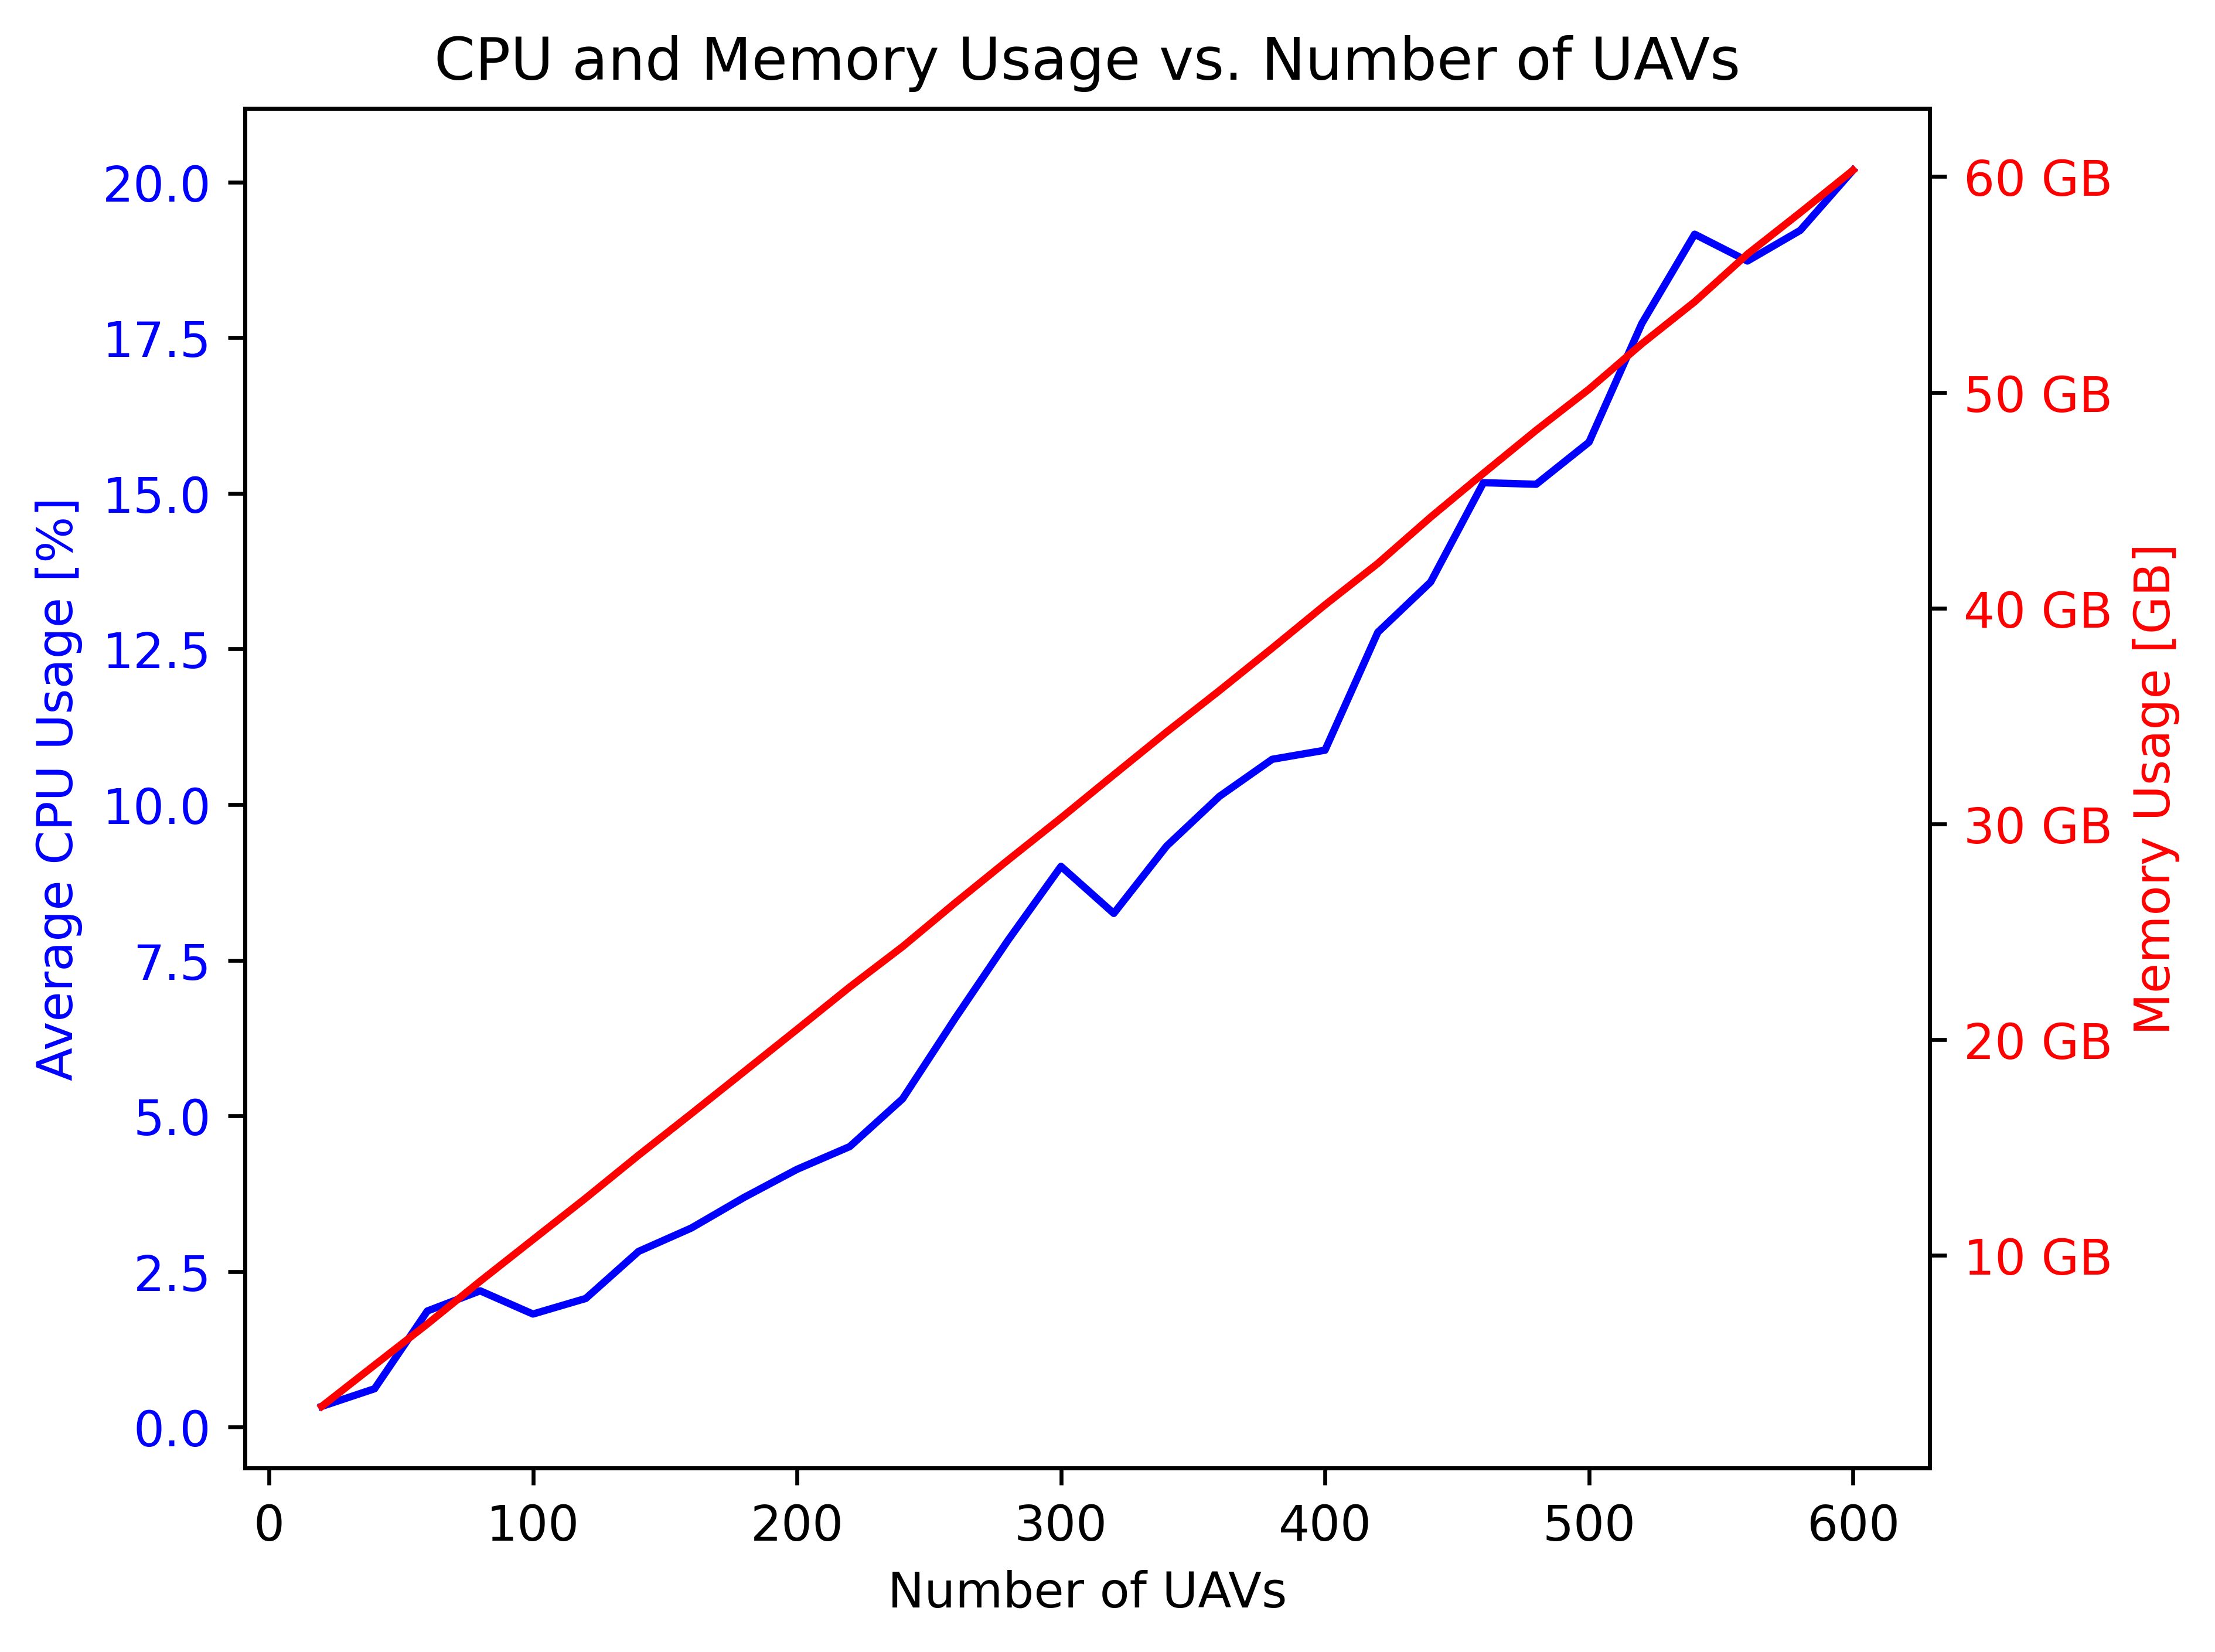

In [13]:
# Initialize the figure
fig, ax1 = plt.subplots()

# Plot the first line (CPU Usage) on the primary y-axis
ax1.plot(x, n[0], color='blue', label='Average CPU Usage')
ax1.set_ylabel('Average CPU Usage [%]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Number of UAVs')

# Create a second y-axis for Memory Usage
ax2 = ax1.twinx()

# Plot the second line (Memory Usage) on the secondary y-axis
ax2.plot(x, n[1], color='red', label='Memory Usage')
ax2.set_ylabel('Memory Usage [GB]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format the y-axis of the second axis to show values in GB
def bytes_to_gb(x, pos):
    return f'{x / 1e9:.0f} GB'  # Divide by 1e9 and format as GB

formatter = mticker.FuncFormatter(bytes_to_gb)
ax2.yaxis.set_major_formatter(formatter)

# Add a title for the plot
plt.title('CPU and Memory Usage vs. Number of UAVs')

# Ensure the layout is tight and clean
plt.tight_layout()

# Display the plot
plt.show()
